# Importing Libraries

In [503]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")
from statsmodels.tsa.stattools import coint, adfuller

# Pair Identification and Selection

## Downloading Stock Price Data

In [504]:
start_date='2017-06-01'
end_date='2020-07-01'

In [505]:
tick={"TATAMOTORS.NS" , "M&M.NS","BAJAJ-AUTO.NS","TVSMOTOR.NS","EICHERMOT.NS","BOSCHLTD.NS","AMARAJABAT.NS","EXIDEIND.NS","BALKRISIND.NS","BHARATFORG.NS","NIFTYBEES.NS","ESCORTS.NS","JKTYRE.NS"}

In [506]:
val=yf.download(tick,start_date,end_date)
data=val['Adj Close']
data.head()

[*********************100%%**********************]  13 of 13 completed


,AMARAJABAT.NS,BAJAJ-AUTO.NS,BALKRISIND.NS,BHARATFORG.NS,BOSCHLTD.NS,EICHERMOT.NS,ESCORTS.NS,EXIDEIND.NS,JKTYRE.NS,M&M.NS,NIFTYBEES.NS,TATAMOTORS.NS,TVSMOTOR.NS
Date,,,,,,,,,,,,,
2017-06-01,803.098755,2235.979004,740.646729,570.897095,21675.283203,2538.867676,677.949585,210.178055,155.826569,659.216125,98.207001,475.169037,514.599548
2017-06-02,808.093628,2246.610352,728.262512,564.884399,21664.408203,2572.965088,701.096008,209.394684,160.046661,656.094238,98.633003,477.262512,520.914490
2017-06-05,814.105896,2282.480225,735.445801,562.067444,21739.927734,2585.785889,729.380615,209.578995,159.502151,658.499207,98.944000,476.664368,522.939148
2017-06-06,812.024780,2262.911133,739.597046,552.314575,21567.195312,2573.944092,735.497559,206.399384,162.905472,652.833313,98.550003,459.567657,517.009766
2017-06-07,808.648499,2264.840576,732.390564,573.098755,21741.156250,2619.971436,736.378418,206.030731,165.809647,662.291870,98.778000,456.576996,516.913391


## Selecting stocks using Cointegration approach

In [507]:
def find_cointegrated_pairs(data):
    n = len(data.columns)
    p_value_matrix = np.ones((n, n))
    keys = data.columns
    pairs = []
    mini=1
    for i in range(n):
        for j in range(i+1, n):
            stock1 = data[keys[i]]
            stock2 = data[keys[j]]
            result = coint(stock1,stock2)
            p_value = result[1]
            p_value_matrix[i, j] = p_value
            if p_value < 0.05:
                if p_value<mini:
                    s1=keys[i]
                    s2=keys[j]
                    mini=p_value
                    si=i
                    sj=j
    pairs.append((s1,s2))

    return p_value_matrix, pairs,si,sj

In [508]:
p_value_matrix, cointegrated_pair,i,j = find_cointegrated_pairs(data)

In [509]:
cointegrated_pair

[('AMARAJABAT.NS', 'BHARATFORG.NS')]

In [510]:
p_value_matrix

array([[1.        , 0.31949787, 0.31732932, 0.02098205, 0.08412555,
        0.0361302 , 0.46560323, 0.16570219, 0.05285467, 0.07409894,
        0.29770079, 0.11262519, 0.03930347],
       [1.        , 1.        , 0.13154393, 0.13921006, 0.12673634,
        0.12946399, 0.13464728, 0.09135006, 0.1231198 , 0.12143404,
        0.0711225 , 0.10843208, 0.14599155],
       [1.        , 1.        , 1.        , 0.86103061, 0.60885088,
        0.65329039, 0.02990209, 0.84633925, 0.61669582, 0.78640588,
        0.70785354, 0.63201061, 0.7451668 ],
       [1.        , 1.        , 1.        , 1.        , 0.61880352,
        0.37191238, 0.99345295, 0.79432657, 0.24026978, 0.71388142,
        0.94937221, 0.42494311, 0.10410095],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        0.64115023, 0.86574215, 0.45260297, 0.41594639, 0.4821366 ,
        0.83809243, 0.58736853, 0.16685958],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.90345

In [511]:
p_value_matrix[i][j]

0.02098205374768517

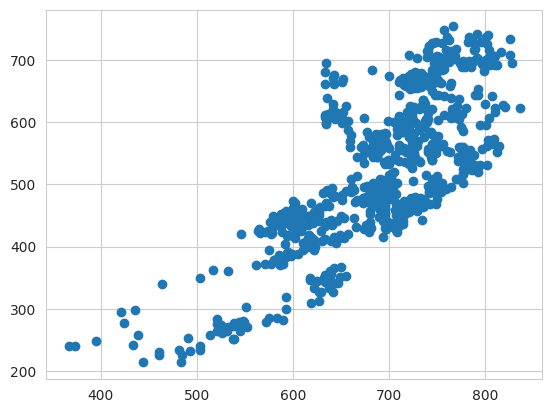

In [512]:
plt.scatter(data['AMARAJABAT.NS'], data['BHARATFORG.NS'])

# Testing Data

In [513]:
st='2020-07-01'
ed='2023-07-01'

pair=['AMARAJABAT.NS','BHARATFORG.NS']
AA=yf.download(pair,st,ed)['Adj Close']
A=AA[pair[0]]
B=AA[pair[1]]

[*********************100%%**********************]  2 of 2 completed


##Spread Calculation and Plot

In [514]:
import statsmodels.api as sm

Text(0, 0.5, 'Spread')

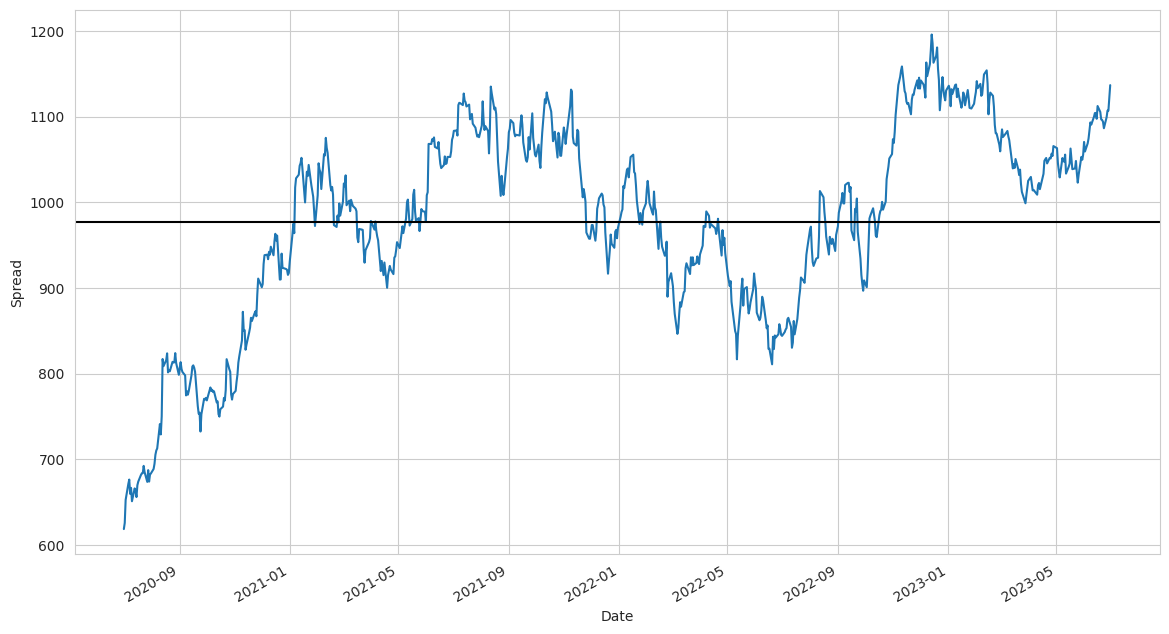

In [515]:
A = sm.add_constant(A)
results = sm.OLS(B, A).fit()
A=A[pair[0]]
b = results.params[pair[0]]

spread = B - b * A
spread.plot(figsize=(14, 8))
plt.axhline(spread.mean(), color='black')
plt.ylabel('Spread')

## Augmented Dickey Fuller Test

In [516]:
import statsmodels.tsa.stattools as ts

In [517]:
adf=ts.adfuller(spread)
print(adf[0])
print(adf[4])
#t_stat value lies close to 95% value showing that there is atleast 95% chance that the time series of spread will be stationary

-2.898451257711873
{'1%': -3.439146171679794, '5%': -2.865422101274577, '10%': -2.568837245865348}


## Z Score

In [518]:
def zscore(series):
    lookback = 15
    scores = []
    for i in range(lookback, len(series)):
      window = series[i-lookback:i]
      scores.append((series[i]-window.mean())/window.std())
    return pd.Series(scores, index = series.index[lookback:])

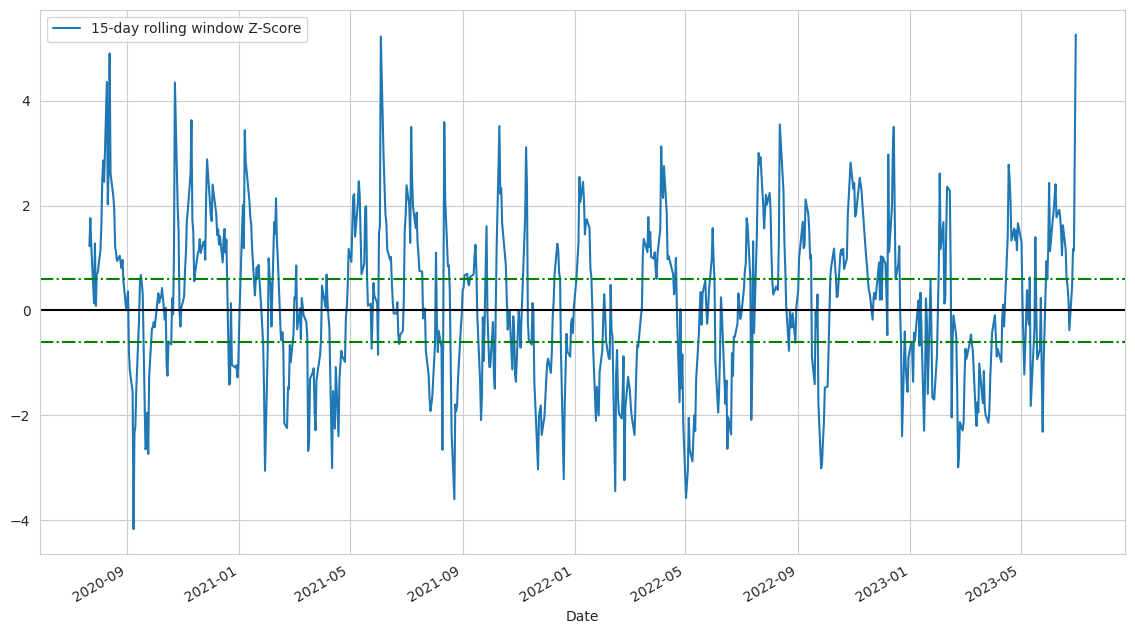

In [519]:
zscore(spread).plot(figsize=(14, 8))
plt.axhline(0.0, color='black')
plt.axhline(0.6, color='green', linestyle='-.')
plt.axhline(-0.6, color='green', linestyle='-.')
plt.legend(['15-day rolling window Z-Score'])

# Strategy Development

In [520]:
def trade_signals(S1, S2, spread):
  signals = pd.DataFrame()
  signals['price1'] = S1
  signals['price2'] = S2
  signals['spread'] = spread
  signals['zscore'] = zscore(spread)
  signals.dropna(inplace = True)
  signals['signal1'] = np.select([signals['zscore'] > 0.6, signals['zscore'] < -0.6], [1, -1], default = 0)
  signals['position1'] = signals['signal1'].diff()
  signals['signal2'] = -signals['signal1']
  signals['position2'] = signals['signal2'].diff()

  return signals
  #taking entry in a trade whenever z_score exceeds the value 0.6 or goes below -0.6 and taking exit whenever z score reaches near zero.

In [521]:
trade_when = trade_signals(A,B, spread)
trade_when.dropna(inplace = True)
trade_when

,price1,price2,spread,zscore,signal1,position1,signal2,position2
Date,,,,,,,,
2020-07-23,687.287903,381.213837,692.291551,1.761766,1,0.0,-1,0.0
2020-07-24,682.899841,375.976929,685.068535,1.238797,1,0.0,-1,0.0
2020-07-27,660.380798,374.704407,673.603527,0.134443,0,-1.0,0,1.0
2020-07-28,668.144409,384.933441,687.346498,1.276736,1,1.0,-1,-1.0
2020-07-29,654.353271,377.787811,673.958774,0.085705,0,-1.0,0,1.0
...,...,...,...,...,...,...,...,...
2023-06-23,628.639465,801.811218,1086.343693,-0.379502,0,0.0,0,0.0
2023-06-26,638.786011,810.057800,1099.182767,0.465228,0,0.0,0,0.0
2023-06-27,646.012268,814.479248,1106.874937,1.169308,1,1.0,-1,-1.0


# Backtesting

In [522]:
def plot_trades(signals):
  fig = plt.figure(figsize=(14, 8))
  bx = fig.add_subplot(111)
  series = bx.plot(signals['zscore'], c='#4abdac')
  long = bx.plot(signals['zscore'][signals['position1'] == -1], lw = 0, marker = '^', markersize = 6, c = 'g')
  short = bx.plot(signals['zscore'][signals['position1'] == 1], lw = 0, marker = 'v', markersize = 6, c = 'r')
  plt.legend(['Z-Score', 'Long', 'Short'])

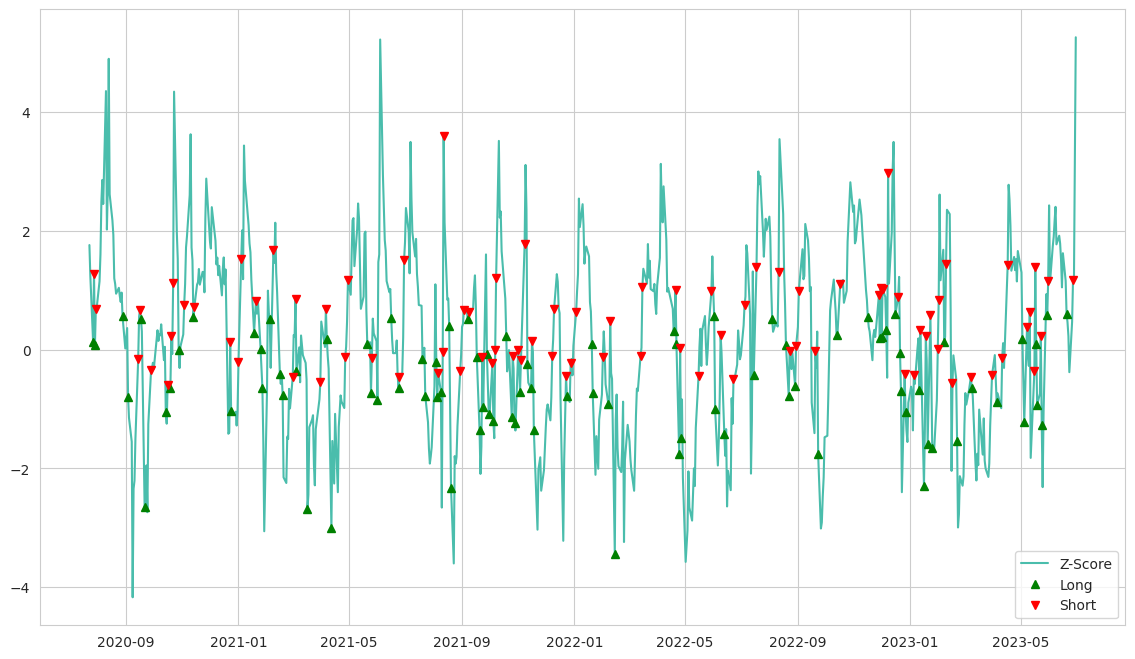

In [523]:
plot_trades(trade_when)


In [524]:
def plot_1(signals):
  fig = plt.figure(figsize=(14,8))
  bx = fig.add_subplot(111)
  l1 = bx.plot(signals['price1'], c='#4abdac')
  u1 = bx.plot(signals['price1'][signals['position1'] == 1], lw=0, marker='^', markersize=6, c='g',alpha=0.9)
  u2, = bx.plot(signals['price1'][signals['position1'] == -1], lw=0, marker='v', markersize=6, c='r',alpha=0.9)
  plt.title('AMARAJABAT.NS')
  plt.legend(['Price', 'Long', 'Short'])

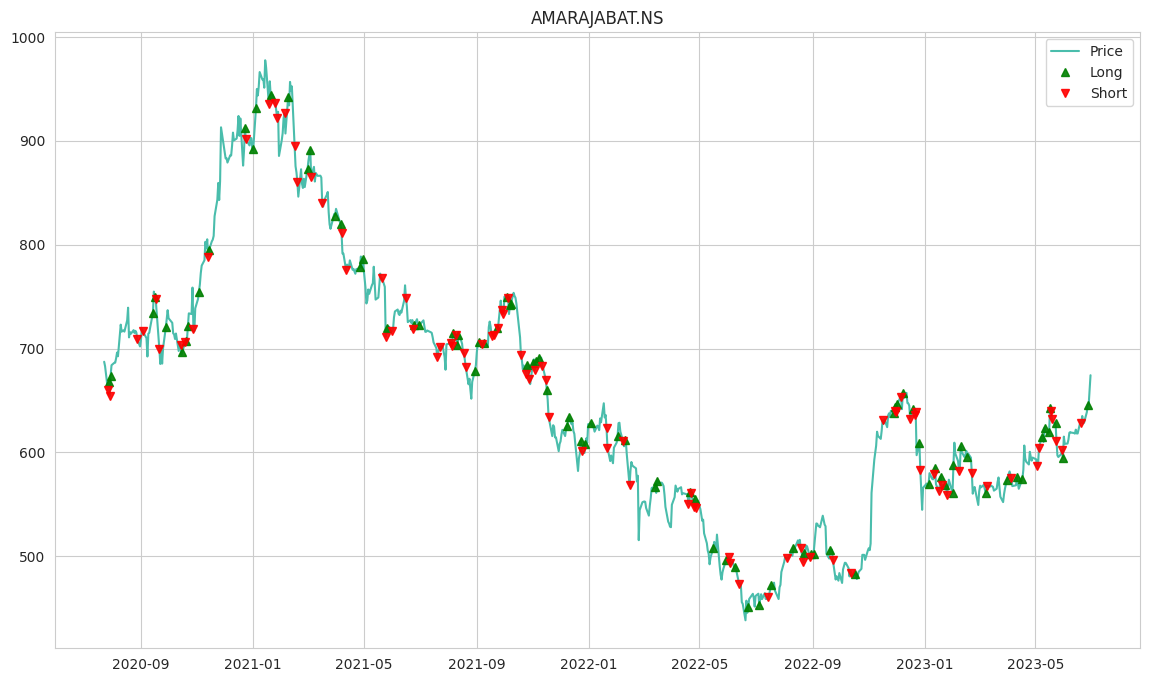

In [525]:
plot_1(trade_when)


In [526]:
def plot_2(signals):
  fig=plt.figure(figsize=(14,8))
  bx = fig.add_subplot(111)
  l1 = bx.plot(signals['price2'], c='#4abdac')
  u1 = bx.plot(signals['price2'][signals['position2'] == 1], lw=0, marker='^', markersize=6, c='g')
  u2 = bx.plot(signals['price2'][signals['position2'] == -1], lw=0, marker='v', markersize=6, c='r')
  plt.title('BHARATFORG.NS')
  plt.legend(['Price', 'Long', 'Short'])


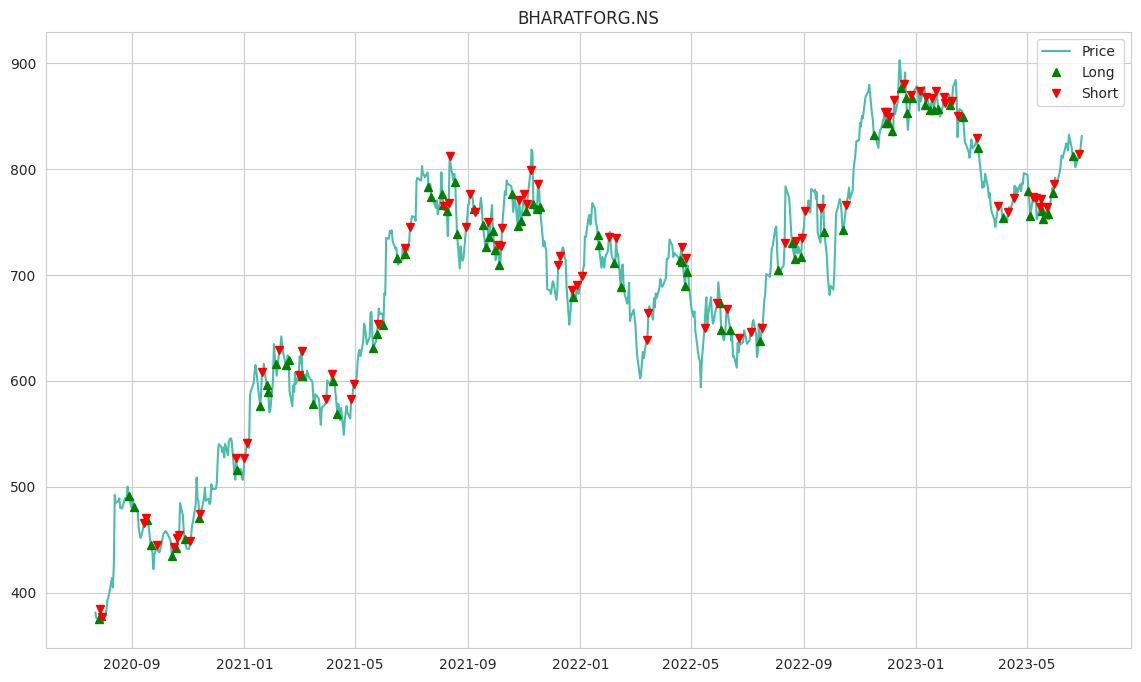

In [527]:
plot_2(trade_when)


In [528]:
def Calculate_PnL(signals):

  initial_capital = 50000

  # For every trade we use the whole current amount we are holding to both stocks
  #Assuming fractional shares aren't allowed
  shares1 = initial_capital// (signals['price1'][0])
  shares2 = initial_capital// (signals['price2'][0])

  #PnL for stock 1
  portfolio = pd.DataFrame()
  portfolio['holdings1'] = signals['position1'].cumsum() * signals['price1'] * shares1
  portfolio['cash1'] = initial_capital - (signals['position1'] * signals['price1'] * shares1).cumsum()
  portfolio['total1'] = portfolio['holdings1'] + portfolio['cash1']
  portfolio['return1'] = portfolio['total1'].pct_change()

  # PnL for stock 2
  portfolio['holdings2'] = signals['position2'].cumsum() * signals['price2'] * shares2
  portfolio['cash2'] = initial_capital - (signals['position2'] * signals['price2'] * shares2).cumsum()
  portfolio['total2'] = portfolio['holdings2'] + portfolio['cash2']
  portfolio['return2'] = portfolio['total2'].pct_change()

  # Total PnL
  portfolio['total'] = portfolio['total1'] + portfolio['total2']
  portfolio = portfolio.dropna()

  return portfolio


In [529]:
portfolio = Calculate_PnL(trade_when)
portfolio.tail()

,holdings1,cash1,total1,return1,holdings2,cash2,total2,return2,total
Date,,,,,,,,,
2023-06-23,-45262.041504,100167.568848,54905.527344,-0.000908,105037.269592,38503.362762,143540.632355,-0.007157,198446.159698
2023-06-26,-45992.592773,100167.568848,54174.976074,-0.013306,106117.571838,38503.362762,144620.934601,0.007526,198795.910675
2023-06-27,0.000000,53654.685547,53654.685547,-0.009604,0.000000,145200.144257,145200.144257,0.004005,198854.829803
2023-06-28,0.000000,53654.685547,53654.685547,0.000000,0.000000,145200.144257,145200.144257,0.000000,198854.829803
2023-06-30,0.000000,53654.685547,53654.685547,0.000000,0.000000,145200.144257,145200.144257,0.000000,198854.829803


# Visualisation

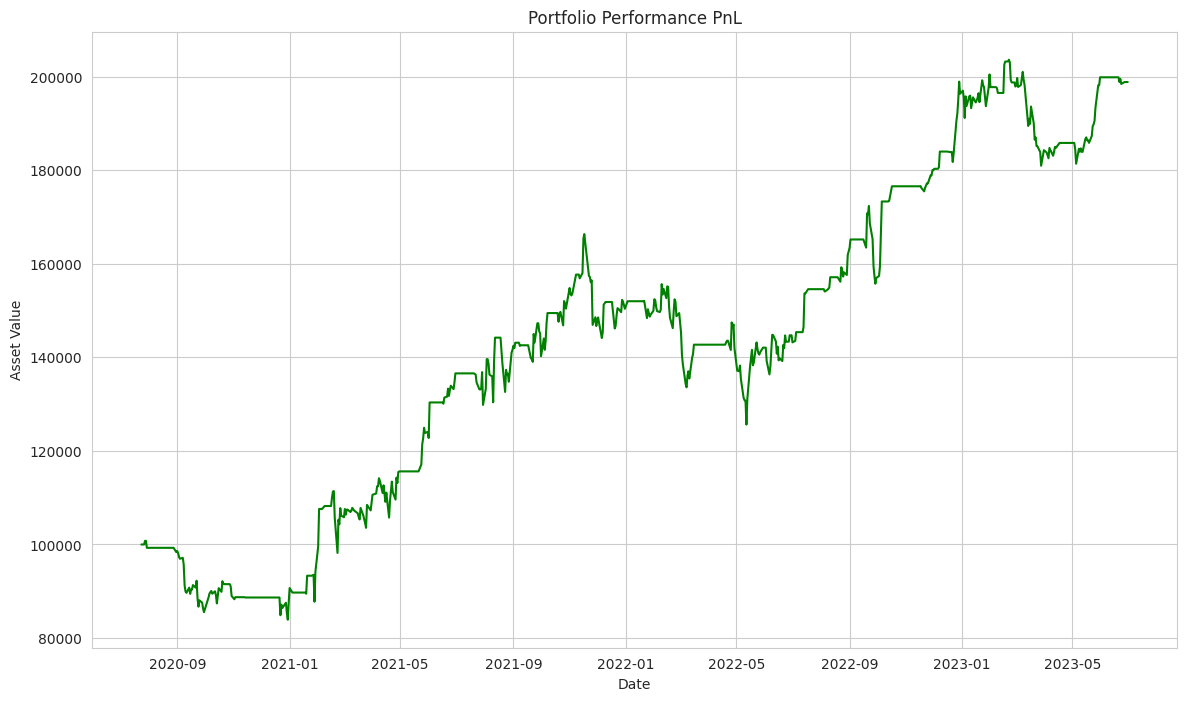

In [530]:
def plot_portfolio_value(portfolio):
  fig = plt.figure(figsize=(14,8),)
  ax = fig.add_subplot(111)
  l1 = ax.plot(portfolio['total'], c='g')
  plt.ylabel('Asset Value')
  plt.xlabel('Date')
  plt.title('Portfolio Performance PnL')

plot_portfolio_value(portfolio)

## Portfolio Returns

In [531]:
def calculate_cagr(portfolio):

  final_portfolio = portfolio['total'].iloc[-1]
  initial_portfolio = portfolio['total'].iloc[0]
  delta = len(portfolio.index)
  print('Number of trading days = ', delta)
  YEAR_DAYS = 252
  returns = (final_portfolio/initial_portfolio) ** (YEAR_DAYS/delta) - 1
  return returns

In [532]:
print('CAGR = {:.3f}%' .format(calculate_cagr(portfolio) * 100))


Number of trading days =  730
CAGR = 26.782%


In [533]:
returns=(portfolio['total']/portfolio['total'].shift(1))-1
returns=returns[1:]
returns.tail()

Date
2023-06-23   -0.005436
2023-06-26    0.001762
2023-06-27    0.000296
2023-06-28    0.000000
2023-06-30    0.000000
Name: total, dtype: float64

In [534]:
log_returns=np.log(portfolio['total']/portfolio['total'].shift(1))
log_returns=log_returns[1:]
log_returns.tail()

Date
2023-06-23   -0.005451
2023-06-26    0.001761
2023-06-27    0.000296
2023-06-28    0.000000
2023-06-30    0.000000
Name: total, dtype: float64

In [535]:
cumulated_returns=(1+returns).cumprod()-1
cumulated_returns.tail()

Date
2023-06-23    0.984462
2023-06-26    0.987959
2023-06-27    0.988548
2023-06-28    0.988548
2023-06-30    0.988548
Name: total, dtype: float64

## Key Performance Indexes

In [536]:
risk_free_rate=0.8/252
excess_return=returns-risk_free_rate
sharpe_ratio=np.sqrt(252)*(risk_free_rate-returns.mean())/returns.std()
print("The sharpe ratio comes out to be :",sharpe_ratio)

The sharpe ratio comes out to be : 2.1387048473231967


In [537]:
max_data_stock=portfolio['total'].rolling(window=len(portfolio['total']),min_periods=1).max()
dd_stock=portfolio['total']/max_data_stock-1
MDD_stock=dd_stock.rolling(window=len(portfolio['total']),min_periods=1).min()
print("The value of Maximum Drawdown is :",MDD_stock.min()*100 ,"%")

The value of Maximum Drawdown is : -24.475017795090935 %
